In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [9]:
dataset = pd.read_csv("DigitalMarketing.csv",sep=";")

In [10]:
dataset2 = dataset.copy()

In [11]:
dataset2

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77,216,126,"279,1",83,"12,56","9,9",6,"2,67",2,0
3329,68,415,3703271,no,no,0,231,39,13,57,153,55,"191,3",123,"8,61","9,6",4,"2,59",3,0
3330,28,510,3288230,no,no,0,181,31,25,109,289,58,"191,9",91,"8,64","14,1",6,"3,81",2,0
3331,184,510,3646381,yes,no,0,214,36,14,105,160,84,"139,2",137,"6,26",5,10,"1,35",2,0


In [12]:
dataset2['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [13]:
dataset2.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,sale product views,app transactions,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,100.107711,4.479448,1.562856,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,19.568609,2.461214,1.315491,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,87.000000,3.000000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,100.000000,4.000000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,113.000000,6.000000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,20.000000,9.000000,1.000000


In [14]:
#Checking for unsual datatypes.i.e "avg order value,discount rate per visited products,product detail view per app session,add to cart per session"
dataset2.dtypes

account length                          int64
location code                           int64
user id                                 int64
credit card info save                  object
push status                            object
add to wishlist                         int64
desktop sessions                        int64
app sessions                            int64
desktop transactions                    int64
total product detail views              int64
session duration                        int64
promotion clicks                        int64
avg order value                        object
sale product views                      int64
discount rate per visited products     object
product detail view per app session    object
app transactions                        int64
add to cart per session                object
customer service calls                  int64
churn                                   int64
dtype: object

In [16]:
dataset2.isna().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [17]:
dataset2.isnull().sum()

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64

In [18]:
dataset2.shape

(3333, 20)

<Axes: xlabel='churn', ylabel='count'>

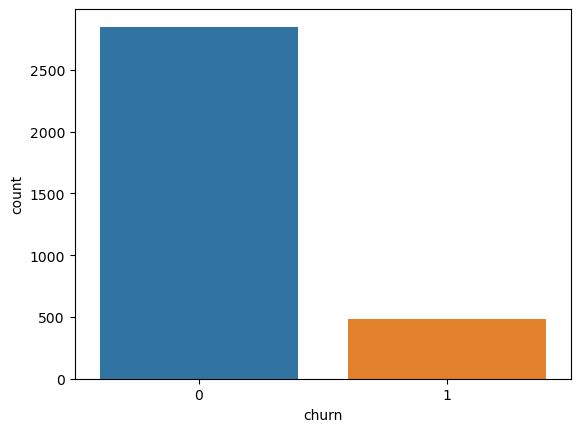

In [19]:
sns.countplot(data=dataset2,x='churn')

In [20]:
dataset2.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

<Axes: xlabel='location code', ylabel='count'>

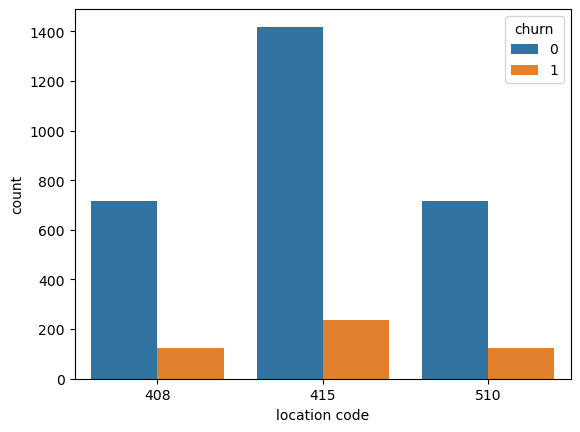

In [21]:
#Churn based on location code
sns.countplot(x='location code',hue='churn',data=dataset2)

<Axes: xlabel='app transactions', ylabel='count'>

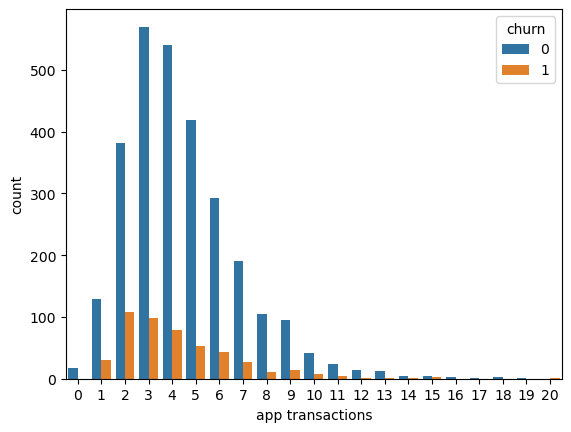

In [22]:
#Churn based on app transsactions
sns.countplot(x='app transactions',hue='churn',data=dataset2)

array([<Axes: title={'center': 'app transactions'}>,
       <Axes: title={'center': 'location code'}>], dtype=object)

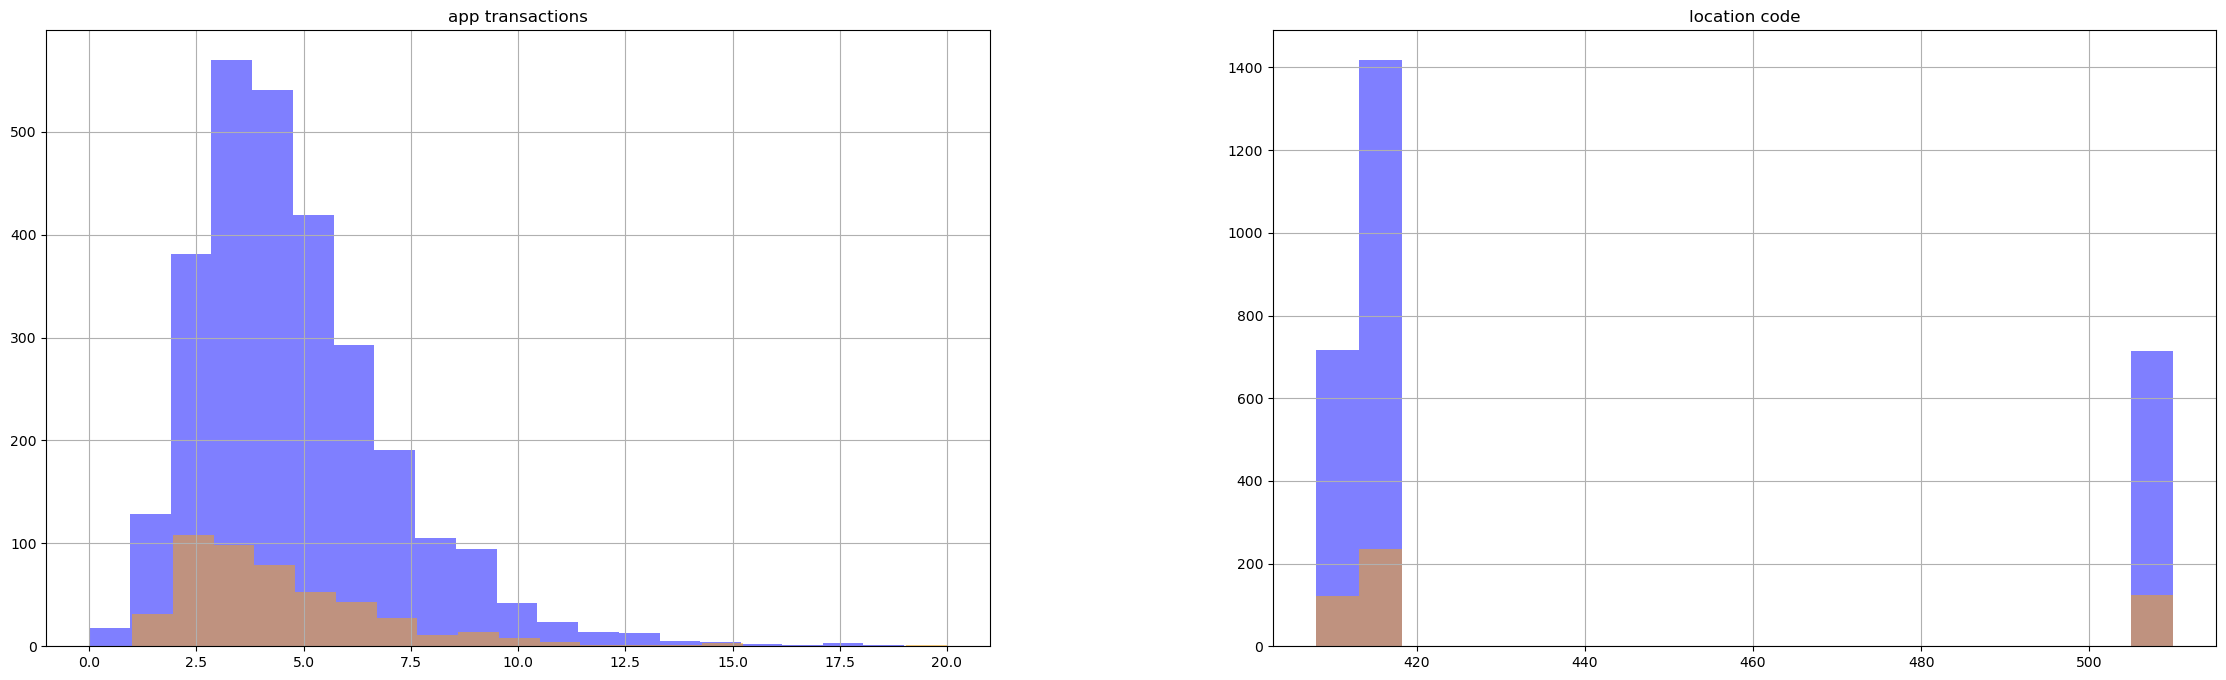

In [24]:
#Cheking customers who left based on app transactions and location code
numerical_features = ['app transactions','location code']
fig,ax = plt.subplots(1,2, figsize=(28,8))
dataset2[dataset2.churn==0][numerical_features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
dataset2[dataset2.churn==1][numerical_features].hist(bins=20,color='orange',alpha=0.5,ax=ax)



In [26]:
#chaging the odd columns to numerical values
for column in dataset2.columns:
    if dataset2[column].dtypes==np.number:
        continue
    dataset2[column] = LabelEncoder().fit_transform(dataset2[column])
    


C:\Users\user\AppData\Local\Temp\ipykernel_11552\3115107220.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset2[column].dtypes==np.number:
C:\Users\user\AppData\Local\Temp\ipykernel_11552\3115107220.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset2[column].dtypes==np.number:
C:\Users\user\AppData\Local\Temp\ipykernel_11552\3115107220.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset2[column].dtypes==np.number:
C:\Users\user\AppData\Local\Temp\ipykernel_11552\3115107220.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dataset2

In [28]:
dataset2.dtypes

account length                         int64
location code                          int64
user id                                int64
credit card info save                  int32
push status                            int32
add to wishlist                        int64
desktop sessions                       int64
app sessions                           int64
desktop transactions                   int64
total product detail views             int64
session duration                       int64
promotion clicks                       int64
avg order value                        int32
sale product views                     int64
discount rate per visited products     int32
product detail view per app session    int32
app transactions                       int64
add to cart per session                int32
customer service calls                 int64
churn                                  int64
dtype: object

In [ ]:
#Drop unnecewssary columns
clean_data = dataset2.drop('user id',axis=1)

In [37]:
droped_columns=['user id','account length','add to wishlist','desktop sessions','app sessions','desktop transactions','total product detail views','session duration','promotion clicks','discount rate per visited products']
clean_data = dataset2.drop(droped_columns,axis=1)

In [38]:
clean_data

,location code,credit card info save,push status,avg order value,sale product views,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,1,0,1,1117,49,3,3,79,1,0
1,1,0,1,1198,61,40,3,116,1,0
2,1,0,0,375,62,25,5,101,0,0
3,0,1,0,690,47,128,7,45,2,0
4,1,1,0,596,79,4,3,80,3,0
...,...,...,...,...,...,...,...,...,...,...
3328,1,0,1,1366,41,161,6,78,2,0
3329,1,0,0,637,81,158,4,75,3,0
3330,2,0,0,643,49,44,6,120,2,0
3331,2,1,0,198,95,112,10,29,2,0


In [40]:
#Scaled data
X = clean_data.drop('churn',axis=1)#Features data
y = clean_data['churn']
X = StandardScaler().fit_transform(X)

In [41]:
#Spliting data to 80-20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
#Creating the model
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [43]:
predictions = model.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 

In [44]:
#Check precision
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.15      0.24       101

    accuracy                           0.85       667
   macro avg       0.72      0.56      0.58       667
weighted avg       0.82      0.85      0.82       667

